In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [12]:
%matplotlib inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import sys
import matplotlib as mpl
from matplotlib import rc
from scipy import stats
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})

In [20]:
from scipy.stats import spearmanr

In [14]:
sum_con_fl  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_con-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_200_fl  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_50_fl   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_lo-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_20_fl   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_20-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_5_fl    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_5-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_100_fl  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_100-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_75_fl   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_75-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])
sum_150_fl  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/guppy_3.1.5/1792_fl_mod_150-multi/sequencing_summary.txt', sep='\t', engine='python', usecols=['read_id', 'num_events', 'template_duration', 'sequence_length_template', 'mean_qscore_template'])


cov_con    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_con_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_5      = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_20     = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_20_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_50     = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_50_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_200    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_200_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_100    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_100_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_75    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_75_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')
cov_150    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_150_fl.coverage.plus.bedgraph', sep='\t', skiprows = 1, header = None, usecols=[0,2,3], names=['ref', 'pos', 'cov'], engine='python')



sig_con    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.signal.control.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_5      = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_20     = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_20_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_50     = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_50_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_200    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_200_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_100    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_100_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_75    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_75_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')
sig_150    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_150_fl.signal.sample.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'sig'],  engine='python')



dwell_con  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_con_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_5    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_20   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_20_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_50   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_50_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_200  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_200_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_100  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_100_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_75  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_75_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')
dwell_150  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_150_fl.dwell.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'dwell'],  engine='python')

stat_5    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_20   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_20_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_50   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_50_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_200  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_200_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_100  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_100_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_75  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_75_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')
stat_150  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_150_fl.statistic.plus.wig', delim_whitespace=True, skiprows = 2, names=['pos', 'stat'],  engine='python')


stat_dw_5    = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_5_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_20   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_20_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_50   = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_50_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_200  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_200_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_100  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_100_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_75  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_75_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')
stat_dw_150  = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/mir_1792/analysis_flongle_conc-series/1792_mod_150_fl.statistic_dwell.plus.wig', delim_whitespace=True, skiprows = 1, names=['pos', 'stat'],  engine='python')





shape_1ai = pd.read_csv('/gpfs/commons/projects/ont_nanoprobe/gridion_1792_1/analysis/1792_1ai_miR17-92_DNA.shape', sep='\t', skiprows = 1, names=['pos', 'reac'], engine='python')
shape_1ai = shape_1ai.replace(to_replace = -999, value = 0)

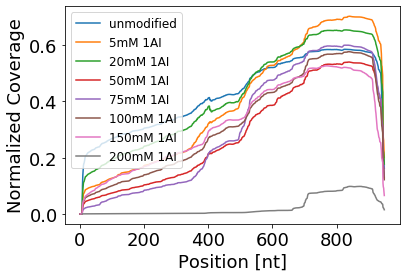

In [15]:
## COVERAGE QC
fig1, axs = plt.subplots(1,1, figsize=(6,4))
axs.plot(cov_con['pos'], cov_con['cov']/len(sum_con_fl), label='unmodified')
axs.plot(cov_5['pos'], cov_5['cov']/len(sum_5_fl), label='5mM 1AI')
axs.plot(cov_20['pos'], cov_20['cov']/len(sum_20_fl), label='20mM 1AI')
axs.plot(cov_50['pos'], cov_50['cov']/len(sum_50_fl), label='50mM 1AI')
axs.plot(cov_75['pos'], cov_75['cov']/len(sum_75_fl), label='75mM 1AI')
axs.plot(cov_100['pos'], cov_100['cov']/len(sum_100_fl), label='100mM 1AI')
axs.plot(cov_150['pos'], cov_150['cov']/len(sum_150_fl), label='150mM 1AI')
axs.plot(cov_200['pos'], cov_200['cov']/len(sum_200_fl), label='200mM 1AI')

axs.set_ylabel('Normalized Coverage')
axs.set_xlabel('Position [nt]')
_=axs.legend(loc='upper left', fontsize=12)

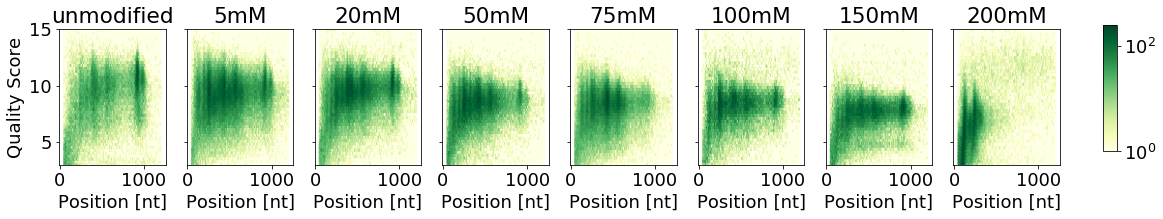

In [16]:
## QUALITY SCORE AND READ LENGTH QC
cmap = 'YlGn'

def filter_reads(df_in, minlen, maxlen):
    return df_in[(df_in['sequence_length_template'] >= minlen) & (df_in['sequence_length_template'] < maxlen)]

min_len = 50
max_len = 1200

lens_con_fl  = filter_reads(sum_con_fl, min_len, max_len)
lens_mod5_fl  = filter_reads(sum_5_fl, min_len, max_len)
lens_mod20_fl  = filter_reads(sum_20_fl, min_len, max_len)
lens_mod50_fl  = filter_reads(sum_50_fl, min_len, max_len)
lens_mod75_fl  = filter_reads(sum_75_fl, min_len, max_len)
lens_mod100_fl  = filter_reads(sum_100_fl, min_len, max_len)
lens_mod150_fl  = filter_reads(sum_150_fl, min_len, max_len)
lens_mod200_fl = filter_reads(sum_200_fl, min_len, max_len)

X = [lens_con_fl, lens_mod5_fl, lens_mod20_fl, lens_mod50_fl, lens_mod75_fl, lens_mod100_fl, lens_mod150_fl, lens_mod200_fl ]

fig2, axs = plt.subplots(1,8, figsize=(20,2.5), sharey=True, sharex=True)
i=0
titles=['unmodified', '5mM', '20mM', '50mM', '75mM', '100mM', '150mM', '200mM']
for ax in axs.flat:
    im = ax.hexbin(X[i]['sequence_length_template'], X[i]['mean_qscore_template'], cmap=cmap, bins='log')
    ax.set_xlabel('Position [nt]')
    ax.set_title(titles[i])
    ax.set_ylim(3,15)
    i+=1
fig2.subplots_adjust(right=0.82)
cbar_ax = fig2.add_axes([0.85, 0.2, 0.01, 0.7])
axs[0].set_ylabel('Quality Score')
_=fig2.colorbar(im, cax=cbar_ax) 
#fig2.savefig('plots/qc_heatmap_1792_1ai_v1.pdf')

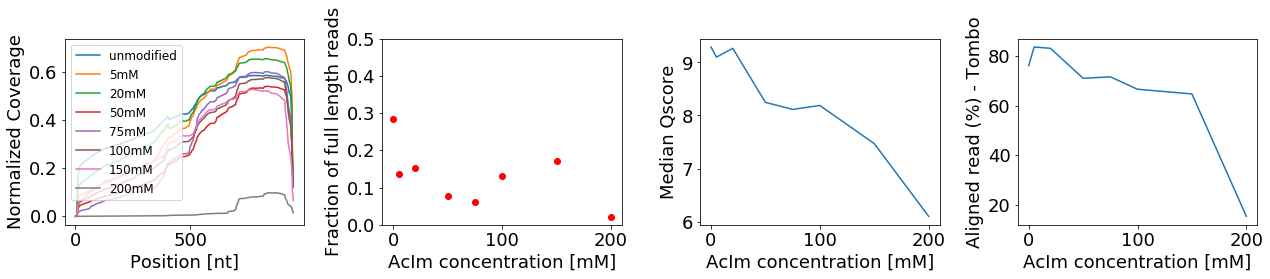

In [17]:
# fraction of full length reads

mn_len=800
mx_len=1100

fracfull_len_con = len(filter_reads(sum_con_fl, mn_len, mx_len)) / len(filter_reads(sum_con_fl, 100, 1200))
fracfull_len_5   = len(filter_reads(sum_5_fl, mn_len, mx_len)) / len(filter_reads(sum_5_fl, 100, 1200))
fracfull_len_20   = len(filter_reads(sum_20_fl, mn_len, mx_len)) / len(filter_reads(sum_20_fl, 100, 1200))
fracfull_len_50  = len(filter_reads(sum_50_fl, mn_len, mx_len)) / len(filter_reads(sum_50_fl, 100, 1200))
fracfull_len_75  = len(filter_reads(sum_75_fl, mn_len, mx_len)) / len(filter_reads(sum_75_fl, 100, 1200))
fracfull_len_100 = len(filter_reads(sum_100_fl, mn_len, mx_len)) / len(filter_reads(sum_100_fl, 100, 1200))
fracfull_len_150 = len(filter_reads(sum_150_fl, mn_len, mx_len)) / len(filter_reads(sum_150_fl, 100, 1200))
fracfull_len_200 = len(filter_reads(sum_200_fl, mn_len, mx_len)) / len(filter_reads(sum_200_fl, 100, 1200)) 

fracfull = [fracfull_len_con, fracfull_len_5, fracfull_len_20, \
            fracfull_len_50,fracfull_len_75, fracfull_len_100, \
            fracfull_len_150, fracfull_len_200]


tombo_resq_unalign = [23.9, 16.4, 16.9, 29.0, 28.4, 33.4, 35.3, 84.6]  # Alignment not produced (%)
hundreds   = [100] *len(tombo_resq_unalign)
tombo_resq_align = np.subtract(hundreds,tombo_resq_unalign)

tombo_resq_presm = [7.3, 4.8, 4.0, 8.2, 4.8, 4.2, 6.9, 4.4]  # Poor raw to expected signal matching (revert with `tombo filter clear_filters`) (%)
tombo_resq_ebb   = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0]  # Read event to sequence alignment extends beyond bandwidth  (%)


median_qscore  = [lens_con_fl['mean_qscore_template'].median(),\
                 lens_mod5_fl['mean_qscore_template'].median(),\
                 lens_mod20_fl['mean_qscore_template'].median(),\
                 lens_mod50_fl['mean_qscore_template'].median(),\
                 lens_mod75_fl['mean_qscore_template'].median(),\
                 lens_mod100_fl['mean_qscore_template'].median(),\
                 lens_mod150_fl['mean_qscore_template'].median(),\
                 lens_mod200_fl['mean_qscore_template'].median()]

mean_qscore  = [lens_con_fl['mean_qscore_template'].mean(),\
                 lens_mod5_fl['mean_qscore_template'].mean(),\
                 lens_mod20_fl['mean_qscore_template'].mean(),\
                 lens_mod50_fl['mean_qscore_template'].mean(),\
                 lens_mod75_fl['mean_qscore_template'].mean(),\
                 lens_mod100_fl['mean_qscore_template'].mean(),\
                 lens_mod150_fl['mean_qscore_template'].mean(),\
                 lens_mod200_fl['mean_qscore_template'].mean()]

concs    = [0, 5, 20, 50, 75, 100, 150, 200]

fig3, axs = plt.subplots(1,4, figsize=(18,4))
axs[0].plot(cov_con['pos'], cov_con['cov']/len(sum_con_fl), label='unmodified')
axs[0].plot(cov_5['pos'], cov_5['cov']/len(sum_5_fl), label='5mM')
axs[0].plot(cov_20['pos'], cov_20['cov']/len(sum_20_fl), label='20mM')
axs[0].plot(cov_50['pos'], cov_50['cov']/len(sum_50_fl), label='50mM')
axs[0].plot(cov_75['pos'], cov_75['cov']/len(sum_75_fl), label='75mM')
axs[0].plot(cov_100['pos'], cov_100['cov']/len(sum_100_fl), label='100mM')
axs[0].plot(cov_150['pos'], cov_150['cov']/len(sum_150_fl), label='150mM')
axs[0].plot(cov_200['pos'], cov_200['cov']/len(sum_200_fl), label='200mM')

axs[0].set_ylabel('Normalized Coverage')
axs[0].set_xlabel('Position [nt]')
_=axs[0].legend(loc='upper left', fontsize=12)

axs[1].plot(concs, fracfull, 'ro')
axs[1].set_ylabel('Fraction of full length reads')
axs[1].set_ylim(0, 0.5)
_=axs[1].set_xlabel('AcIm concentration [mM]')

axs[2].plot(concs, median_qscore, label='Median Qscore')
axs[2].set_ylabel('Median Qscore')
axs[2].set_xlabel('AcIm concentration [mM]')


axs[3].plot(concs, tombo_resq_align)
axs[3].set_ylabel('Aligned read (%) - Tombo')
_=axs[3].set_xlabel('AcIm concentration [mM]')
fig3.tight_layout()

In [38]:
## read numbers table 

concs    = [0, 5, 20, 50, 75, 100, 150, 200]
all_reads      =  [len(sum_con_fl), len(sum_5_fl), len(sum_20_fl), len(sum_50_fl), len(sum_75_fl), len(sum_100_fl), len(sum_150_fl),len(sum_200_fl)]
fulllen_reads  =  [len(filter_reads(sum_con_fl, mn_len, mx_len)),
                  len(filter_reads(sum_5_fl, mn_len, mx_len)),
                  len(filter_reads(sum_20_fl, mn_len, mx_len)),
                  len(filter_reads(sum_50_fl, mn_len, mx_len)),
                  len(filter_reads(sum_75_fl, mn_len, mx_len)),
                  len(filter_reads(sum_100_fl, mn_len, mx_len)),
                  len(filter_reads(sum_150_fl, mn_len, mx_len)),
                  len(filter_reads(sum_200_fl, mn_len, mx_len))]

flongle_df = pd.DataFrame({'conc':concs, 'total':all_reads, 'full':fulllen_reads, 'qscore':median_qscore, 'tombo_align':tombo_resq_align })
flongle_df

,conc,total,full,qscore,tombo_align
0,0,68693,17216,9.289047,76.1
1,5,163000,21173,9.099275,83.6
2,20,117546,16939,9.264365,83.1
3,50,97344,6720,8.246275,71.0
4,75,120932,6944,8.113981,71.6
5,100,52947,6389,8.187519,66.6
6,150,77992,12182,7.469571,64.7
7,200,108096,1669,6.098707,15.4


In [21]:
## COMPARE KS (CURR) STAT
# need to trim the dataframes to similar size for correlation calculation

shape_trim_kscurr_5   = shape_1ai[7:944]
shape_trim_kscurr_20  = shape_1ai[7:944]
shape_trim_kscurr_50  = shape_1ai[7:944]
shape_trim_kscurr_75  = shape_1ai[7:944]
shape_trim_kscurr_100 = shape_1ai[7:944]
shape_trim_kscurr_150 = shape_1ai[7:944]
shape_trim_kscurr_200 = shape_1ai[9:944]

spearman_kscurr_rho = [spearmanr(stat_5['stat'], shape_trim_kscurr_5['reac'])[0], \
                       spearmanr(stat_20['stat'], shape_trim_kscurr_20['reac'])[0], \
                       spearmanr(stat_50['stat'], shape_trim_kscurr_50['reac'])[0], \
                       spearmanr(stat_75['stat'], shape_trim_kscurr_75['reac'])[0], \
                       spearmanr(stat_100['stat'], shape_trim_kscurr_100['reac'])[0], \
                       spearmanr(stat_150['stat'], shape_trim_kscurr_150['reac'])[0], \
                       spearmanr(stat_200['stat'], shape_trim_kscurr_200['reac'])[0]]

print(spearman_kscurr_rho)

[0.15009434058825705, 0.36197630969083433, 0.47873201034282103, 0.4700528517818836, 0.502097783750249, 0.5174204300726204, 0.42713325944687025]


In [22]:
# COMPARE KS (DWELL) STAT
# need to trim the dataframes to similar size for correlation calculation

shape_trim_ksdwell_5   = shape_1ai[15:935]
shape_trim_ksdwell_20  = shape_1ai[15:935]
shape_trim_ksdwell_50  = shape_1ai[15:935]
shape_trim_ksdwell_75  = shape_1ai[15:935]
shape_trim_ksdwell_100 = shape_1ai[15:935]
shape_trim_ksdwell_150 = shape_1ai[15:935]
shape_trim_ksdwell_200 = shape_1ai[15:935]

# need to shift the stat values by Xr(10nt)
nt_shift = 10

stat_dw_5['pos'] = stat_dw_5['pos']-nt_shift
stat_dw_20['pos'] = stat_dw_20['pos']-nt_shift
stat_dw_50['pos'] = stat_dw_50['pos']-nt_shift
stat_dw_75['pos'] = stat_dw_75['pos']-nt_shift
stat_dw_100['pos'] = stat_dw_100['pos']-nt_shift
stat_dw_150['pos'] = stat_dw_150['pos']-nt_shift
stat_dw_200['pos'] = stat_dw_200['pos']-nt_shift

spearman_ksdwell_rho = [spearmanr(stat_dw_5['stat'], shape_trim_ksdwell_5['reac'])[0], \
                        spearmanr(stat_dw_20['stat'], shape_trim_ksdwell_20['reac'])[0], \
                        spearmanr(stat_dw_50['stat'], shape_trim_ksdwell_50['reac'])[0], \
                        spearmanr(stat_dw_75['stat'], shape_trim_ksdwell_75['reac'])[0], \
                        spearmanr(stat_dw_100['stat'], shape_trim_ksdwell_100['reac'])[0], \
                        spearmanr(stat_dw_150['stat'], shape_trim_ksdwell_150['reac'])[0], \
                        spearmanr(stat_dw_200['stat'], shape_trim_ksdwell_200['reac'])[0]]

print(spearman_ksdwell_rho)


[0.015241648222414774, 0.09609735846587436, 0.2620461423780928, 0.21694745957530043, 0.2387473008989735, 0.2754192761424707, 0.2510003261335888]


In [26]:
## load miR 17-92 data

a25 = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/8-5-19_1792_nanocompare/shapemapper_out/a25_miR17-92_DNA_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')

n25 = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/8-5-19_1792_nanocompare/shapemapper_out/n25_miR17-92_DNA_profile.txt', \
sep='\t', usecols=['Nucleotide', 'Sequence', 'Modified_mutations', 'Modified_read_depth', \
'Modified_effective_depth', 'Modified_rate', 'Untreated_mutations', 'Untreated_read_depth', \
'Untreated_effective_depth', 'Untreated_rate', 'Reactivity_profile', 'Std_err', 'HQ_profile', 'HQ_stderr', \
'Norm_profile', 'Norm_stderr'], engine='python')


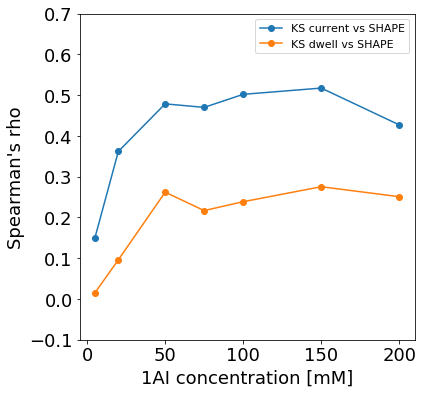

In [28]:
x = [5, 20, 50, 75, 100, 200] # conc of 1ai [final] 
x1 = [5, 20, 50, 75, 100, 150, 200] # conc of 1ai [final] 
fig4, axs = plt.subplots(1,1, figsize=(6,6))
axs.plot(x1, spearman_kscurr_rho, 'o-', label='KS current vs SHAPE')
axs.plot(x1, spearman_ksdwell_rho, 'o-', label='KS dwell vs SHAPE')
axs.set_ylabel('Spearman\'s rho')
axs.set_xlabel('1AI concentration [mM]')
axs.set_ylim(-0.1,0.7)
_=axs.legend(fontsize=11)
#fig4.savefig('plots/corrs_1792_v2.pdf')

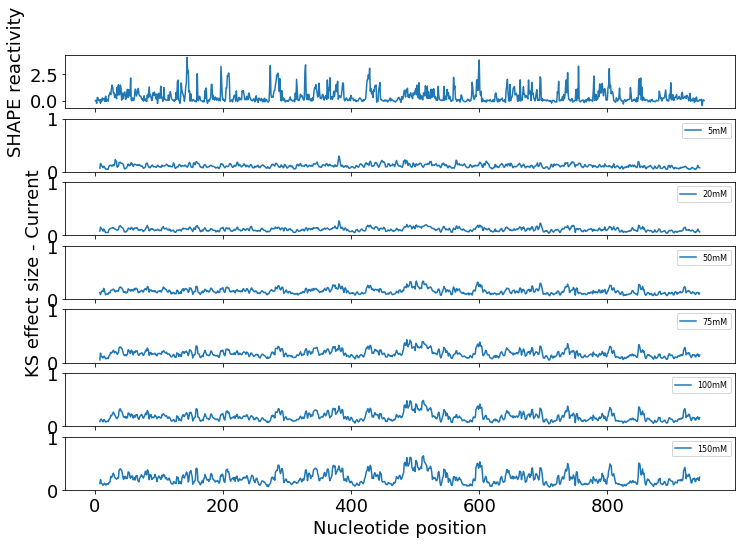

In [41]:
fig107, axs = plt.subplots(7,1, figsize=(12,8), sharex=True)
axs[0].plot(shape_1ai['pos'], shape_1ai['reac'])
axs[1].plot(stat_5['pos'], stat_5['stat'], label='5mM')
axs[2].plot(stat_20['pos'], stat_20['stat'], label='20mM')
axs[3].plot(stat_50['pos'], stat_50['stat'], label='50mM')
axs[4].plot(stat_75['pos'], stat_75['stat'], label='75mM')
axs[5].plot(stat_100['pos'], stat_100['stat'], label='100mM')
axs[6].plot(stat_150['pos'], stat_150['stat'], label='150mM')
#axs.plot(stat_200['pos'], stat_200['stat'], label='200mM')

for ax in axs.reshape(-1)[1:]:
    ax.legend(fontsize=8)
    ax.set_ylim(0.0, 1.0)

axs[0].set_ylabel('SHAPE reactivity')
axs[3].set_ylabel('KS effect size - Current')
_=axs[6].set_xlabel('Nucleotide position')

#fig107.savefig('plots/shape_prof_1792_ks_region_v3.pdf')